In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [38]:
#define a gradient ascent
def grade(X,X_label,w,eta,s):
    grad_ = X.T@(X_label - np.exp(X@w)/(1+np.exp(X@w)))
    w = w*(1+2*s) + eta*grad_/X.shape[0]
    return w

In [39]:
def predict(y,y_label,w):
    size = y_label.shape[0]
    p = 1/(1+np.exp(y@w))
    y_pred = np.zeros((size,1))
    y_pred[p<0.5] = 1
    err = 1-accuracy_score(y_label,y_pred)
    return err

In [40]:
#define variable elimination schedule
def M(k,n,iter,u,i):
    if (iter-2*i)/(2*i*u+iter) <0:
        M_=k
    else:         
        M_ = k + (n-k)*(iter-2*i)/(2*i*u+iter)
    M = int(M_)
    return M    

In [41]:
#define a function to find out m_th biggest value
def FSA(n,w,m):
    i= 0
    w_ = {}
    for i in range(n):
        w_[i]=np.abs(w[i])
    weight_ = sorted(w_.items(),key = lambda x:x[1],reverse = True)
    value_ = weight_[m]
    value = value_[1]
    return value


In [42]:
# update weight
def update(n,w,key):
    for i in range(n):
        if w[i] <key:
            w[i]=0
    return w

In [43]:
# define the normalize 
def scaler(x):
    scaler = StandardScaler()
    scaler = scaler.fit(x)
    y = scaler.fit(x).transform(x)
    return y

In [44]:
# import data 
X_train = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw3\Gisette\gisette_train.data")
X_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw3\Gisette\gisette_train.labels")
y_test = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw3\Gisette\gisette_valid.data")
y_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw3\Gisette\gisette_valid.labels")

In [45]:
X_label = (X_label+1)/2
y_label = (y_label+1)/2

In [46]:
# add a column to the data
X_train = np.hstack((np.ones((np.shape(X_train)[0],1),dtype=int),X_train))
y_test = np.hstack((np.ones((np.shape(y_test)[0],1),dtype=int),y_test))

In [47]:
# normalize  and mat data
X_train = scaler(X_train)
y_test = scaler(y_test)

In [48]:
print(X_train.shape,X_label.shape,y_test.shape,y_label.shape)

(6000, 5001) (6000,) (1000, 5001) (1000,)


In [49]:
m,n = np.shape(X_train)
u = 30
s = 0.0001
iter = 500
eta = 1/m

In [50]:
m,n = np.shape(X_train)
i=0
tr_err_= []
k_=30
w = np.zeros((n))
x = []
for i in range(iter):
    w = grade(X_train,X_label,w,eta,s)
    M_ = M(k_,n,iter,u,i)-1
#         print(M_)
    value = FSA(n,w,M_)
    w = update(n,w,value)
    train_err = predict(X_train,X_label,w)
#         print(np.sum(w==0))
    tr_err_.append(train_err)
    x.append(i)

Text(0, 0.5, 'train misclassifier error')

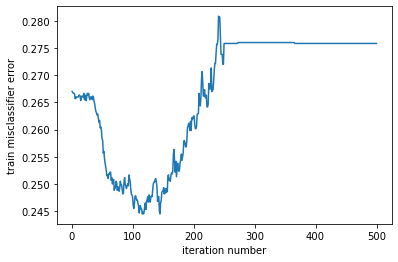

In [51]:
# plt.plot(x,tr_err_)
plt.plot(np.arange(iter)+1,tr_err_)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [52]:
i=0
tr_err = []
te_err = []
K = []
for k in [10,30,100,300,500]:
    w = np.zeros((n))
    for i in range(iter):
        w = grade(X_train,X_label,w,eta,s)
        M_ = M(k,n,iter,u,i)-1
#         print(M_)
        value = FSA(n,w,M_)
        w = update(n,w,value)
    train_err = predict(X_train,X_label,w)
    test_err = predict(y_test,y_label,w)
#         print(np.sum(w==0))
    tr_err.append(train_err)
    te_err.append(test_err)
    K.append(k)

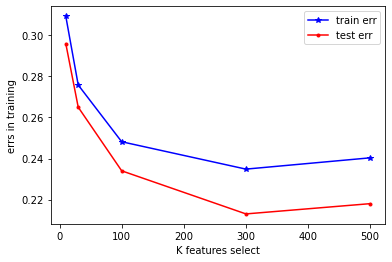

In [53]:
plt.figure()
plt.plot(K,tr_err,'b*-',label = 'train err')
plt.plot(K,te_err,'r.-',label = 'test err')
plt.xlabel('K features select')
plt.ylabel('errs in training')
plt.legend()

In [74]:
# data import
Xtr = pd.read_csv('dexter_train.csv',header = None)
ytr_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw3\dexter\dexter_train.labels")
Xte = pd.read_csv('dexter_valid.csv',header = None)
yte_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw3\dexter\dexter_valid.labels")

In [ ]:
# print(ytr_label)

In [75]:
ytr_label = (ytr_label+1)/2
yte_label = (yte_label+1)/2
# add a column to the data
Xtr = np.hstack((np.ones((np.shape(Xtr)[0],1),dtype=int),Xtr))
Xte = np.hstack((np.ones((np.shape(Xte)[0],1),dtype=int),Xte))
# normalize  and mat data
Xtr = scaler(Xtr)
Xte = scaler(Xte)

In [76]:
print(Xtr.shape,ytr_label.shape,Xte.shape,yte_label.shape)

(300, 20001) (300,) (300, 20001) (300,)


In [77]:
m,n = np.shape(Xtr)
eta = 1/m
i=0
tr_err_b= []
k_=30
w = np.zeros((n))
x = []
for i in range(iter):
    w = grade(Xtr,ytr_label,w,eta,s)
    M_ = M(k_,n,iter,u,i)-1
#         print(M_)
    value = FSA(n,w,M_)
    w = update(n,w,value)
    train_err = predict(Xtr,ytr_label,w)
#         print(np.sum(w==0))
    tr_err_b.append(train_err)
    x.append(i)

Text(0, 0.5, 'train misclassifier error')

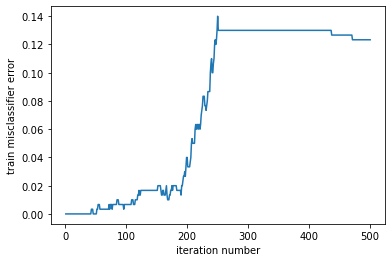

In [78]:
# plt.plot(x,tr_err_b)
plt.plot(np.arange(iter)+1,tr_err_b)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [79]:
i=0
tr_errb = []
te_errb = []
K = []
for k in [10,30,100,300,500]:
    w = np.zeros((n))
    for i in range(iter):
        w = grade(Xtr,ytr_label,w,eta,s)
        M_ = M(k,n,iter,u,i)-1
#         print(M_)
        value = FSA(n,w,M_)
        w = update(n,w,value)
    train_err = predict(Xtr,ytr_label,w)
    test_err = predict(Xte,yte_label,w)
#         print(np.sum(w==0))
    tr_errb.append(train_err)
    te_errb.append(test_err)
    K.append(k)

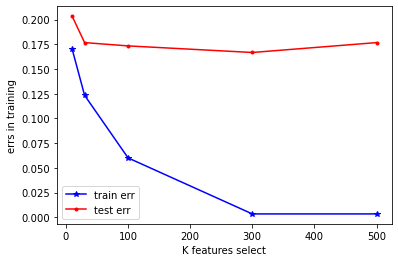

In [80]:
plt.figure()
plt.plot(K,tr_errb,'b*-',label = 'train err')
plt.plot(K,te_errb,'r.-',label = 'test err')
plt.xlabel('K features select')
plt.ylabel('errs in training')
plt.legend()

In [60]:
# data import
train_data = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_train.data")
train_label = np.loadtxt(R"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_train.labels")
test_data = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_valid.data")
test_label = np.loadtxt(r"D:\2020fall\5635 machine learning\5635 hw\hw4\madelon\madelon_valid.labels")

In [61]:
# add a column to the data
train_data = np.hstack((np.ones((np.shape(train_data)[0],1),dtype=int),train_data))
test_data = np.hstack((np.ones((np.shape(test_data)[0],1),dtype=int),test_data))
train_label = (train_label+1)/2
test_label = (test_label +1)/2
# normalizedata
train_data = scaler(train_data)
test_data = scaler(test_data )

In [62]:
print(train_data.shape,train_label.shape,test_data.shape,test_label.shape)

(2000, 501) (2000,) (600, 501) (600,)


In [63]:
m,n = np.shape(train_data)
eta = 1/m
i=0
tr_err_c= []
k_=30
w = np.zeros((n))
x = []
for i in range(iter):
    w = grade(train_data,train_label,w,eta,s)
    M_ = M(k_,n,iter,u,i)-1
#         print(M_)
    value = FSA(n,w,M_)
    w = update(n,w,value)
    train_err = predict(train_data,train_label,w)
#         print(np.sum(w==0))
    tr_err_c.append(train_err)
    x.append(i)

Text(0, 0.5, 'train misclassifier error')

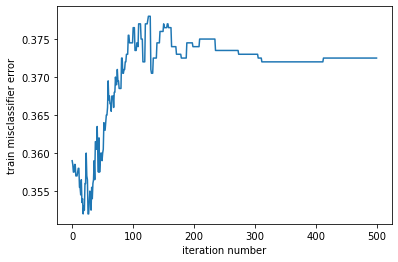

In [64]:
plt.plot(x,tr_err_c)
plt.xlabel('iteration number')
plt.ylabel('train misclassifier error')

In [71]:
i=0
tr_errc = []
te_errc = []
K = []
for k in [10,30,100,300,500]:
    w = np.zeros((n))
    for i in range(iter):
        w = grade(train_data,train_label,w,eta,s)
        M_ = M(k,n,iter,u,i)-1
#         print(M_)
        value = FSA(n,w,M_)
        w = update(n,w,value)
    train_err = predict(train_data,train_label,w)
    test_err = predict(test_data,test_label,w)
#         print(np.sum(w==0))
    tr_errc.append(train_err)
    te_errc.append(test_err)
    K.append(k)

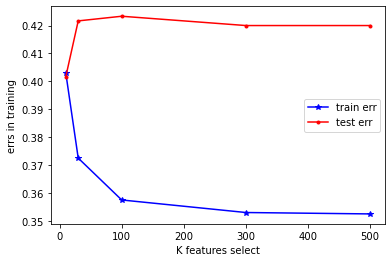

In [72]:
plt.figure()
plt.plot(K,tr_errc,'b*-',label = 'train err')
plt.plot(K,te_errc,'r.-',label = 'test err')
plt.xlabel('K features select')
plt.ylabel('errs in training')
plt.legend()